In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
x_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [4]:
x_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

### Масштабирование признаков с использованием RobustScaler

In [5]:
from sklearn.preprocessing import RobustScaler

In [6]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [7]:
scaler = RobustScaler()

In [8]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [9]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

### Классификация с помощью KNN

In [11]:
k_vals = np.arange(2, 10)

In [12]:
accuracy_valid = []
accuracy_train = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('n_neighbors = {} \n\tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

n_neighbors = 2 
	acc_valid = 0.7937219730941704 
	acc_train = 0.8772455089820359

n_neighbors = 3 
	acc_valid = 0.8161434977578476 
	acc_train = 0.875748502994012

n_neighbors = 4 
	acc_valid = 0.7892376681614349 
	acc_train = 0.8458083832335329

n_neighbors = 5 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8637724550898204

n_neighbors = 6 
	acc_valid = 0.8251121076233184 
	acc_train = 0.8353293413173652

n_neighbors = 7 
	acc_valid = 0.7847533632286996 
	acc_train = 0.8323353293413174

n_neighbors = 8 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8173652694610778

n_neighbors = 9 
	acc_valid = 0.7802690582959642 
	acc_train = 0.8173652694610778



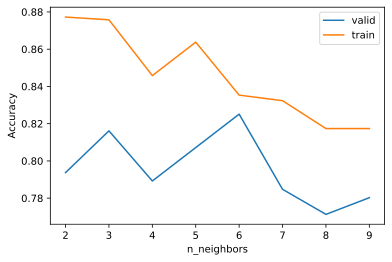

In [13]:
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])

In [14]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [15]:
accuracy_score(y_valid, y_pred)

0.8251121076233184

### Точность и полнота

In [16]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_valid, y_pred)

array([[123,  11],
       [ 28,  61]])

True Negative

In [19]:
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

123

False Positive

In [20]:
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

11

False Negative

In [21]:
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

28

True Positive

In [22]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

61

In [23]:
# Normalized confision matrix
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

array([[0.55156951, 0.04932735],
       [0.12556054, 0.2735426 ]])

Точность

In [24]:
Precision = TP / (TP + FP)
Precision

0.8472222222222222

In [25]:
from sklearn.metrics import precision_score

In [26]:
precision_score(y_valid, y_pred)

0.8472222222222222

Полнота

In [27]:
Recall = TP / (TP + FN)
Recall

0.6853932584269663

In [28]:
from sklearn.metrics import recall_score

In [29]:
recall_score(y_valid, y_pred)

0.6853932584269663

### F1 score

In [30]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

0.7577639751552795

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_valid, y_pred)

0.7577639751552795

### Метрика AUC

In [33]:
y_pred_proba = clf.predict_proba(x_valid)

In [34]:
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [35]:
y_pred_proba = y_pred_proba[:, 1]

In [36]:
y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.83333333, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.16666667,
       1.        , 0.33333333, 0.83333333, 0.        , 0.16666667,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.16666667,
       0.33333333, 0.5       , 0.83333333, 0.5       , 0.        ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.66666667,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.        , 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.     

Text(0, 0.5, 'Количество')

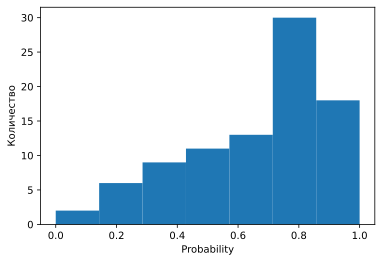

In [37]:
plt.hist(y_pred_proba[y_valid == 1], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

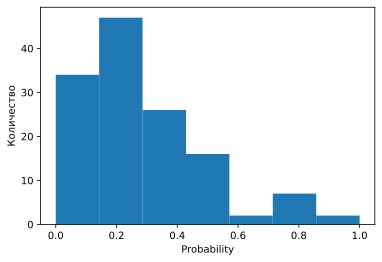

In [38]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Density')

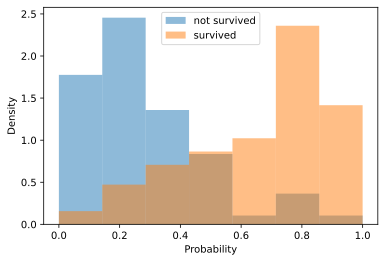

In [39]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7, density = True, alpha = 0.5)
plt.hist(y_pred_proba[y_valid == 1], bins = 7, density = True, alpha = 0.5)
plt.legend(['not survived', 'survived'])
plt.xlabel('Probability')
plt.ylabel('Density')

In [40]:
from sklearn.metrics import roc_curve

In [41]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label = 1)

False Positive Rate (fall-out)

FPR = FP / N = FP / (FP + TN)

True Positive Rate (recall, sensitivity, hit rate)

TPR = TP / P = TP / (TP + FN)

In [42]:
fpr

array([0.        , 0.01492537, 0.06716418, 0.08208955, 0.20149254,
       0.39552239, 0.74626866, 1.        ])

In [43]:
tpr

array([0.        , 0.20224719, 0.53932584, 0.68539326, 0.80898876,
       0.91011236, 0.97752809, 1.        ])

In [44]:
thresholds

array([2.        , 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

In [45]:
# FPR для порога, равного 1
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 0).sum()

0.014925373134328358

In [46]:
# TPR для порога, равного 1
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 1).sum()

0.20224719101123595

In [47]:
# FPR для порога, равного 0.83333333
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 0).sum()

0.06716417910447761

In [48]:
# TPR для порога, равного 0.83333333
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 1).sum()

0.5393258426966292

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

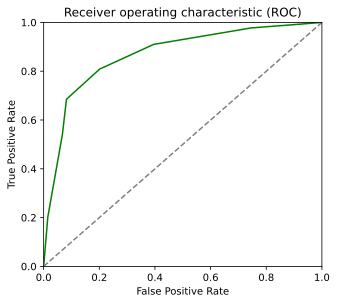

In [49]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='green', label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc_score(y_valid, y_pred_proba)

0.8679356028844541